In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('matches.csv')

In [4]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [5]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [6]:
df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [7]:
df.replace({'season':{'2007/08': 2008, '2009': 2009, '2009/10': 2010, '2011': 2011, '2012': 2012, '2013': 2013, '2014': 2014,
                      '2015': 2015, '2016': 2016, '2017': 2017, '2018': 2018, '2019': 2019, '2020/21': 2020, '2021': 2021, '2022': 2022,
                      '2023': 2023, '2024': 2024}}, inplace=True)

C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\2284943971.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'season':{'2007/08': 2008, '2009': 2009, '2009/10': 2010, '2011': 2011, '2012': 2012, '2013': 2013, '2014': 2014,


In [8]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [9]:
team={"Mumbai Indians":"MI",
          "Chennai Super Kings":"CSK",
          "Kolkata Knight Riders":"KKR",
          "Royal Challengers Bangalore":"RCB",
          "Royal Challengers Bengaluru":"RCB",
          "Rajasthan Royals":"RR",
          "Kings XI Punjab":"KXIP",
          "Punjab Kings":"PBKS",
          "Sunrisers Hyderabad":"SRH",
          "Deccan Chargers":"DEC",
          "Delhi Capitals":"DC",
          "Delhi Daredevils":"DC",
          "Gujarat Titans":"GT",
          "Gujarat Lions":"GL",
          "Lucknow Super Giants":"LSG",
          "Pune Warriors":"PWI",
          "Rising Pune Supergiant":"RPS",
          "Rising Pune Supergiants":"RPS",
          "Kochi Tuskers Kerala":"KTK"}

columns_to_map = ['team1', 'team2', 'winner', 'toss_winner']
for columns in columns_to_map:
  df[columns] = df[columns].map(team)

In [10]:
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [11]:
df[df['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,DC,RCB,RCB,field,RCB,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,RCB,MI,RCB,field,RCB,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,KKR,DC,KKR,bat,DC,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,RR,KXIP,KXIP,field,KXIP,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,KXIP,SRH,SRH,field,KXIP,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,RR,CSK,RR,field,CSK,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,RCB,KKR,RCB,field,KKR,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,SRH,DC,SRH,bat,SRH,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,CSK,MI,MI,bat,CSK,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,DC,MI,MI,bat,DC,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [12]:
df.loc[df['city'].isna(), 'city'] = df['venue'].str.split().apply(lambda x: x[0])


C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\3639427908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['city'].value_counts(), palette='viridis')


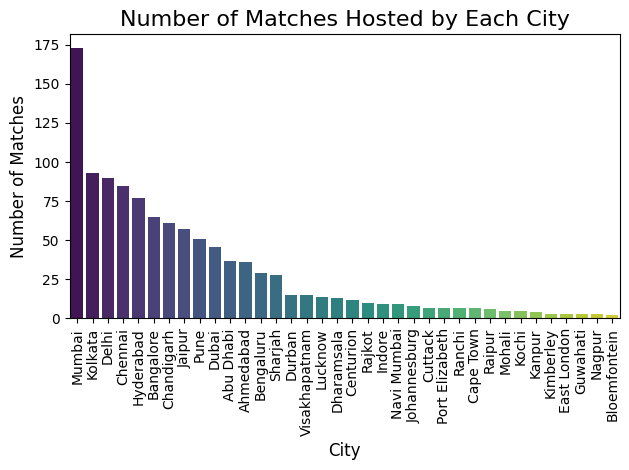

In [13]:
sns.barplot(data=df['city'].value_counts(), palette='viridis')
plt.title('Number of Matches Hosted by Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
df.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [15]:
df[df['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,DC,PWI,DC,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,RCB,RR,RR,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,RCB,DC,RCB,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,RCB,RR,RR,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,LSG,CSK,CSK,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [16]:
for col in ['winner', 'player_of_match', 'method']:
  df[col].fillna(df['result'], inplace=True)

C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\430462357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df['result'], inplace=True)


In [17]:
for col in ['result_margin', 'target_runs', 'target_overs']:
  df[col].fillna(0, inplace=True)

C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\3835593698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [18]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

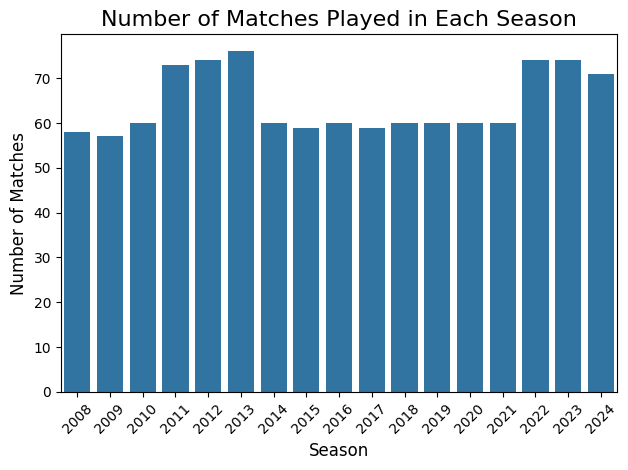

In [19]:
sns.barplot(data=df['season'].value_counts())
plt.title('Number of Matches Played in Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,runs,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,runs,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,DC,RR,RR,bat,DC,wickets,9.0,130.0,20.0,N,wickets,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5.0,166.0,20.0,N,wickets,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,KKR,DEC,DEC,bat,KKR,wickets,5.0,111.0,20.0,N,wickets,BF Bowden,K Hariharan


C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\3661337514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['match_type'].value_counts(), palette='viridis')


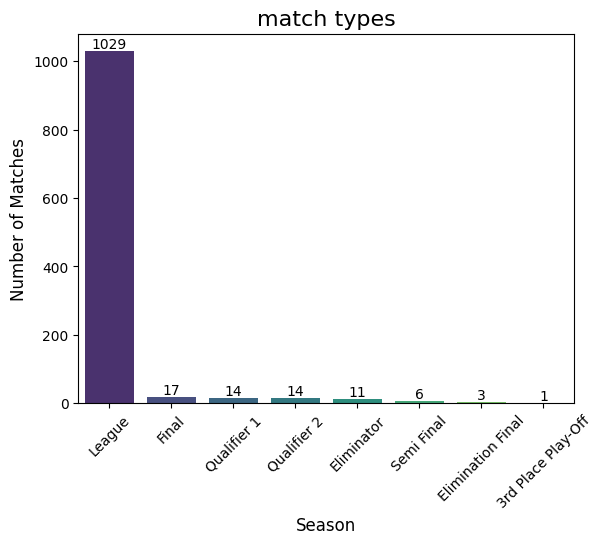

In [21]:
sns.barplot(df['match_type'].value_counts(), palette='viridis')
plt.title('match types', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
for index, value in enumerate(df['match_type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [22]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,runs,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,runs,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,DC,RR,RR,bat,DC,wickets,9.0,130.0,20.0,N,wickets,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5.0,166.0,20.0,N,wickets,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,KKR,DEC,DEC,bat,KKR,wickets,5.0,111.0,20.0,N,wickets,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",PBKS,SRH,PBKS,bat,SRH,wickets,4.0,215.0,20.0,N,wickets,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",SRH,KKR,SRH,bat,KKR,wickets,8.0,160.0,20.0,N,wickets,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",RCB,RR,RR,field,RR,wickets,4.0,173.0,20.0,N,wickets,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",SRH,RR,RR,field,SRH,runs,36.0,176.0,20.0,N,runs,Nitin Menon,VK Sharma


C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\3334135264.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['player_of_match'].value_counts()[:10], palette='viridis')


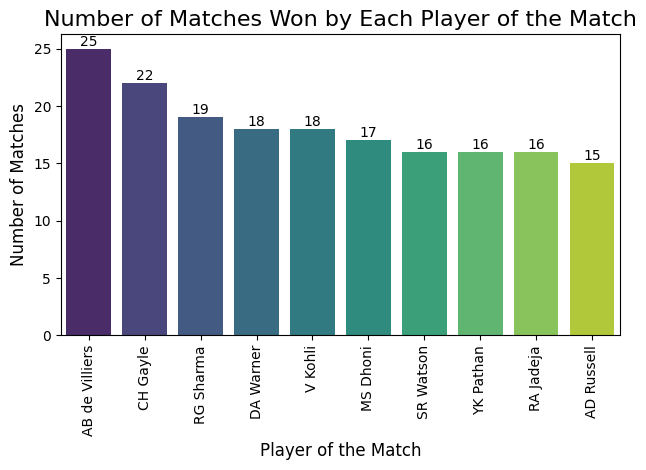

In [23]:
sns.barplot(df['player_of_match'].value_counts()[:10], palette='viridis')
plt.title('Number of Matches Won by Each Player of the Match', fontsize=16)
plt.xlabel('Player of the Match', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
for index, value in enumerate(df['player_of_match'].value_counts()[:10]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
teams=pd.concat([df['team1'], df['team2']])
teams.unique()

array(['RCB', 'KXIP', 'DC', 'MI', 'KKR', 'RR', 'DEC', 'CSK', 'KTK', 'PWI',
       'SRH', 'GL', 'RPS', 'PBKS', 'LSG', 'GT'], dtype=object)

In [25]:
total_matches=teams.value_counts()
total_matches

MI      261
RCB     255
DC      252
KKR     251
CSK     238
RR      221
KXIP    190
SRH     182
DEC      75
PBKS     56
PWI      46
GT       45
LSG      44
GL       30
RPS      30
KTK      14
Name: count, dtype: int64

In [26]:
wins=df['winner'].value_counts()
wins

winner
MI           144
CSK          138
KKR          131
RCB          123
DC           115
RR           112
SRH           88
KXIP          88
DEC           29
GT            28
PBKS          24
LSG           24
RPS           15
GL            13
PWI           12
KTK            6
no result      5
Name: count, dtype: int64

In [27]:
win_per=(wins/total_matches)*100
win_per.sort_values(ascending=False)

GT           62.222222
CSK          57.983193
MI           55.172414
LSG          54.545455
KKR          52.191235
RR           50.678733
RPS          50.000000
SRH          48.351648
RCB          48.235294
KXIP         46.315789
DC           45.634921
GL           43.333333
KTK          42.857143
PBKS         42.857143
DEC          38.666667
PWI          26.086957
no result          NaN
Name: count, dtype: float64

In [28]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [29]:
win_per_df=pd.DataFrame({
    'Total Matches': total_matches,
    'Matches Won': wins,
    'Win Percentage': win_per})
win_per_df=win_per_df.sort_values(by='Win Percentage', ascending=False)
win_per_df=win_per_df.drop(index='no result')

In [30]:
win_per_df

,Total Matches,Matches Won,Win Percentage
GT,45.0,28,62.222222
CSK,238.0,138,57.983193
MI,261.0,144,55.172414
LSG,44.0,24,54.545455
KKR,251.0,131,52.191235
RR,221.0,112,50.678733
RPS,30.0,15,50.000000
SRH,182.0,88,48.351648
RCB,255.0,123,48.235294
KXIP,190.0,88,46.315789


C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\1450498970.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(win_per_df['Win Percentage'], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'GT'),
  Text(1, 0, 'CSK'),
  Text(2, 0, 'MI'),
  Text(3, 0, 'LSG'),
  Text(4, 0, 'KKR'),
  Text(5, 0, 'RR'),
  Text(6, 0, 'RPS'),
  Text(7, 0, 'SRH'),
  Text(8, 0, 'RCB'),
  Text(9, 0, 'KXIP'),
  Text(10, 0, 'DC'),
  Text(11, 0, 'GL'),
  Text(12, 0, 'KTK'),
  Text(13, 0, 'PBKS'),
  Text(14, 0, 'DEC'),
  Text(15, 0, 'PWI')])

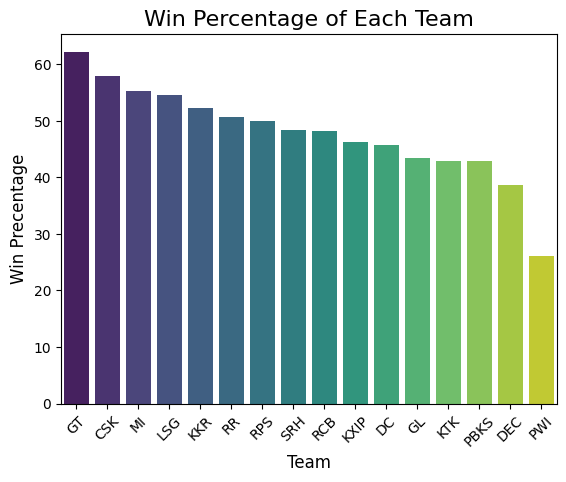

In [31]:
sns.barplot(win_per_df['Win Percentage'], palette='viridis')
plt.title('Win Percentage of Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Precentage', fontsize=12)
plt.xticks(rotation=45)

In [32]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,runs,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,runs,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,DC,RR,RR,bat,DC,wickets,9.0,130.0,20.0,N,wickets,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5.0,166.0,20.0,N,wickets,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,KKR,DEC,DEC,bat,KKR,wickets,5.0,111.0,20.0,N,wickets,BF Bowden,K Hariharan


C:\Users\aprit\AppData\Local\Temp\ipykernel_20156\2182692175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['toss_decision'].value_counts(), palette='viridis')


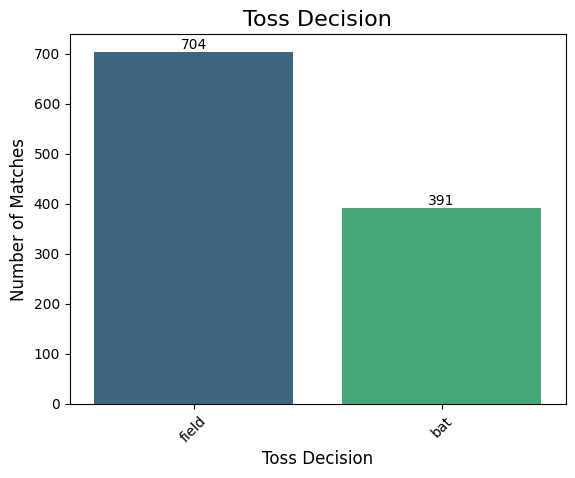

In [33]:
sns.barplot(df['toss_decision'].value_counts(), palette='viridis')
plt.title('Toss Decision', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
for index, value in enumerate(df['toss_decision'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [34]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,runs,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,runs,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,DC,RR,RR,bat,DC,wickets,9.0,130.0,20.0,N,wickets,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5.0,166.0,20.0,N,wickets,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,KKR,DEC,DEC,bat,KKR,wickets,5.0,111.0,20.0,N,wickets,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",PBKS,SRH,PBKS,bat,SRH,wickets,4.0,215.0,20.0,N,wickets,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",SRH,KKR,SRH,bat,KKR,wickets,8.0,160.0,20.0,N,wickets,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",RCB,RR,RR,field,RR,wickets,4.0,173.0,20.0,N,wickets,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",SRH,RR,RR,field,SRH,runs,36.0,176.0,20.0,N,runs,Nitin Menon,VK Sharma
